### 1. Importing Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas, NumPy, MatPlotLib, Seaborn libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing lead dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2. Data Inspection

In [4]:
# checking the shape of the data 
lead_data.shape

(9240, 37)

The dataset contains 9240 rows and 37 columns

In [5]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

All columns/variables are in correct format

In [6]:
# Classify the dataset into continous and categorical variables
cat_cols = lead_data.dtypes[~(lead_data.dtypes == 'int64') & ~(lead_data.dtypes == 'float64')].keys()
cont_cols = lead_data.dtypes[(lead_data.dtypes == 'int64') | (lead_data.dtypes == 'float64')].keys()
print('Categorical columns: ', cat_cols, end='\n')
print('Continous columns: ', cont_cols, end='\n')

Categorical columns:  Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
Continous columns:  Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score',

### 3. Data Cleaning

In [7]:
# Describing data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Count the number of Select values in the columns. Exclude columns with count 0.
for col in lead_data.columns:
    num_of_select = (lead_data[col] == 'Select').sum()
    if num_of_select > 0:
        print('{} : {}'.format(col, num_of_select))

Specialization : 1942
How did you hear about X Education : 5043
Lead Profile : 4146
City : 2249


We observe that there are 'Select' values in many columns. It may be because the customer did not select any option from the list, hence it shows 'Select'.
'Select' values are as good as NULL. So we can convert these values to null values.

In [9]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [10]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# Finding the null percentages across columns
null_percent = round(lead_data.isnull().sum()/len(lead_data.index),2)*100
print(null_percent)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40%.

In [12]:
# Drop the column which as more than 40% of missing values
for col in lead_data.columns:
    null_percent = round(lead_data[col].isnull().sum()/len(lead_data.index),2)*100
    if null_percent > 40.0:
        print('{} : {}'.format(col, null_percent))
        lead_data=lead_data.drop(columns=col)
        print('{} column dropped'.format(col))
        

How did you hear about X Education : 78.0
How did you hear about X Education column dropped
Lead Quality : 52.0
Lead Quality column dropped
Lead Profile : 74.0
Lead Profile column dropped
Asymmetrique Activity Index : 46.0
Asymmetrique Activity Index column dropped
Asymmetrique Profile Index : 46.0
Asymmetrique Profile Index column dropped
Asymmetrique Activity Score : 46.0
Asymmetrique Activity Score column dropped
Asymmetrique Profile Score : 46.0
Asymmetrique Profile Score column dropped


In [13]:
# Data set after dropping the missing values
null_percent = round(lead_data.isnull().sum()/len(lead_data.index),2)*100
print(null_percent.sort_values(ascending=False))

City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Last Activity                                     1.0
Through Recommendations                           0.0
Receive More Updates About Our Courses            0.0
Prospect ID                                       0.0
Newspaper                                         0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
A free copy of Mastering The Interview            0.0
Digital Advertisement                             0.0
Search                      

In [14]:
# Code foe countplot
def plot_count_plot(val):
    plt.figure(figsize=(10,5))
    sns.countplot(x=val)
    plt.xticks(rotation=90)

##### 1. Columns : 'City' and 'Country'
These columns have 40% and 27% of missing values

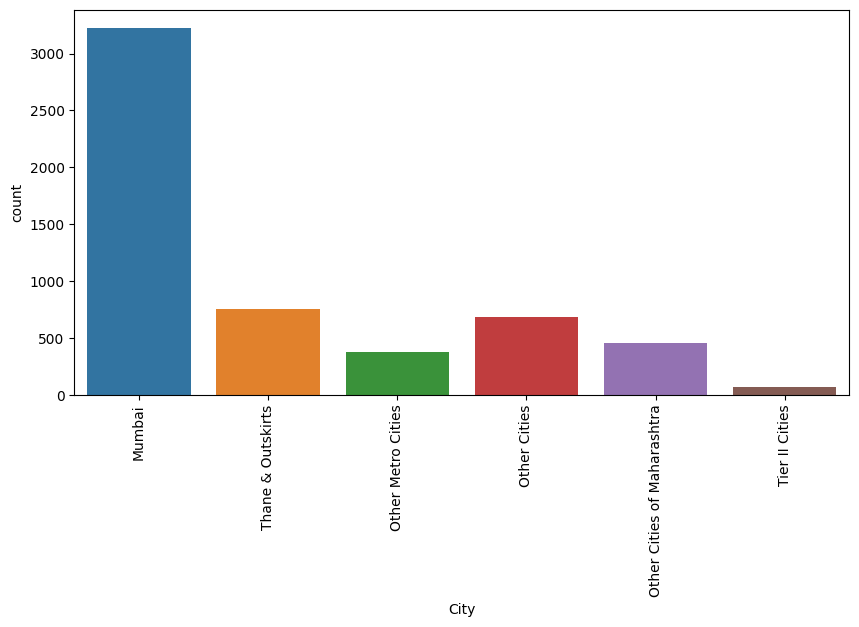

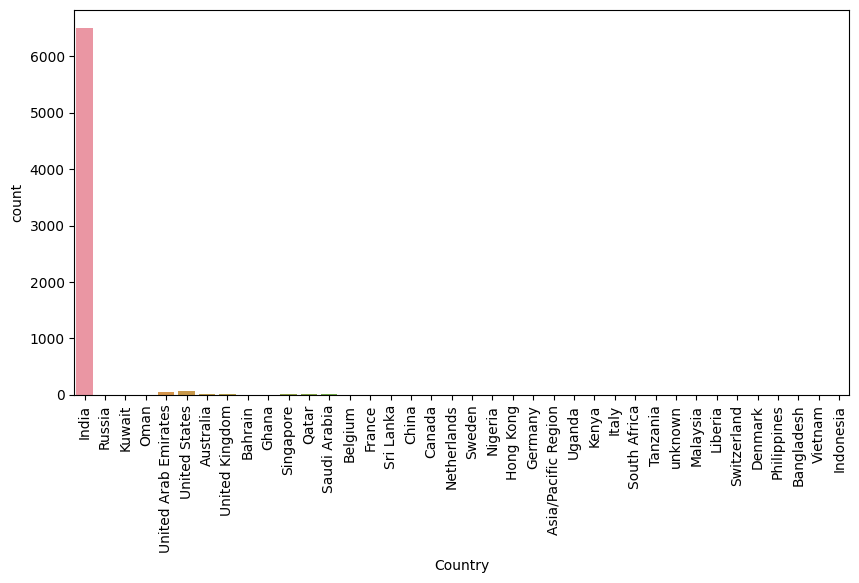

In [15]:
# Check the count of each value and their percentages
plot_count_plot(lead_data['City'])
plot_count_plot(lead_data['Country'])

In [16]:
# Finding the percentage of the different categories of this column:
print('City Data:')
print(round(lead_data['City'].value_counts(normalize=True),2)*100)
print('\n')
print('Country Data:')
print(round(lead_data['Country'].value_counts(normalize=True),2)*100)

City Data:
Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64


Country Data:
India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Nethe

As you might be able to interpret, City and Country won't be of any use to our analysis. So, we can drop them.

In [17]:
# Dropping City and Country
lead_data.drop(['City','Country'], axis = 1, inplace = True)

In [18]:
# Let's check the missing percentage again
null_percent = round(lead_data.isnull().sum()/len(lead_data.index),2)*100
print(null_percent.sort_values(ascending=False))

Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Last Activity                                     1.0
TotalVisits                                       1.0
Page Views Per Visit                              1.0
Prospect ID                                       0.0
Digital Advertisement                             0.0
Through Recommendations                           0.0
Receive More Updates About Our Courses            0.0
X Education Forums                                0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
A free copy of Mastering The Interview            0.0
Newspaper                                         0.0
Search                                            0.0
Newspaper Article           

##### 2. Column : 'Tags'
This column has 36% missing values

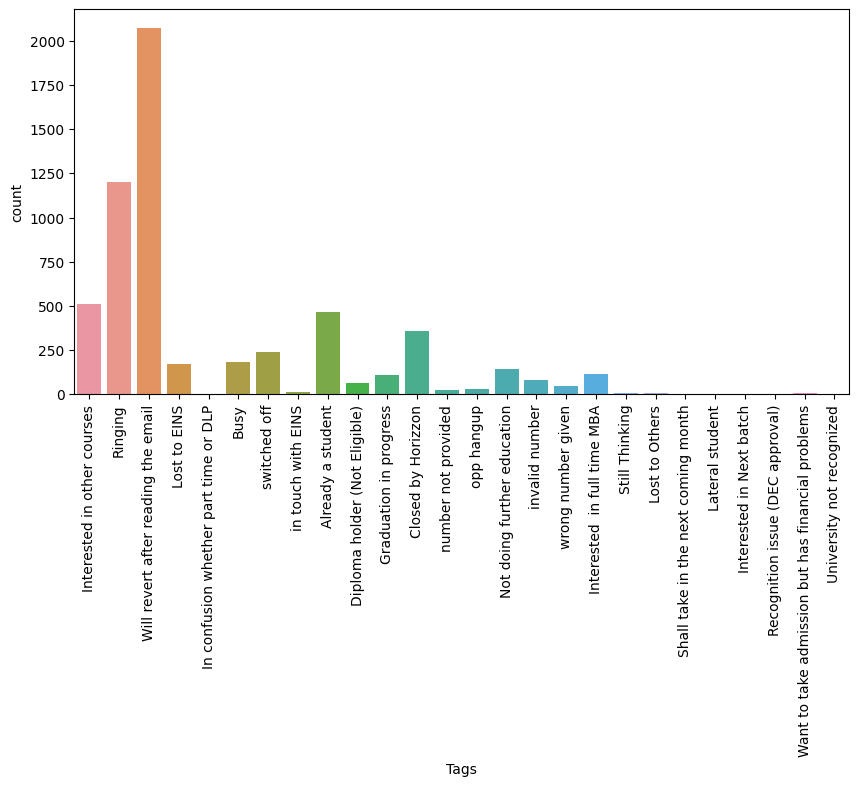

In [19]:
plot_count_plot(lead_data['Tags'])

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [20]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

In [21]:
# Let's check the missing percentage again
null_percent = round(lead_data.isnull().sum()/len(lead_data.index),2)*100
print(null_percent.sort_values(ascending=False))

Specialization                                   37.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Last Activity                                     1.0
Prospect ID                                       0.0
Digital Advertisement                             0.0
Through Recommendations                           0.0
Receive More Updates About Our Courses            0.0
X Education Forums                                0.0
Tags                                              0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
A free copy of Mastering The Interview            0.0
Newspaper                                         0.0
Search                                            0.0
Newspaper Article           

##### 3. Column : 'Specialization'
This column has 37% missing values

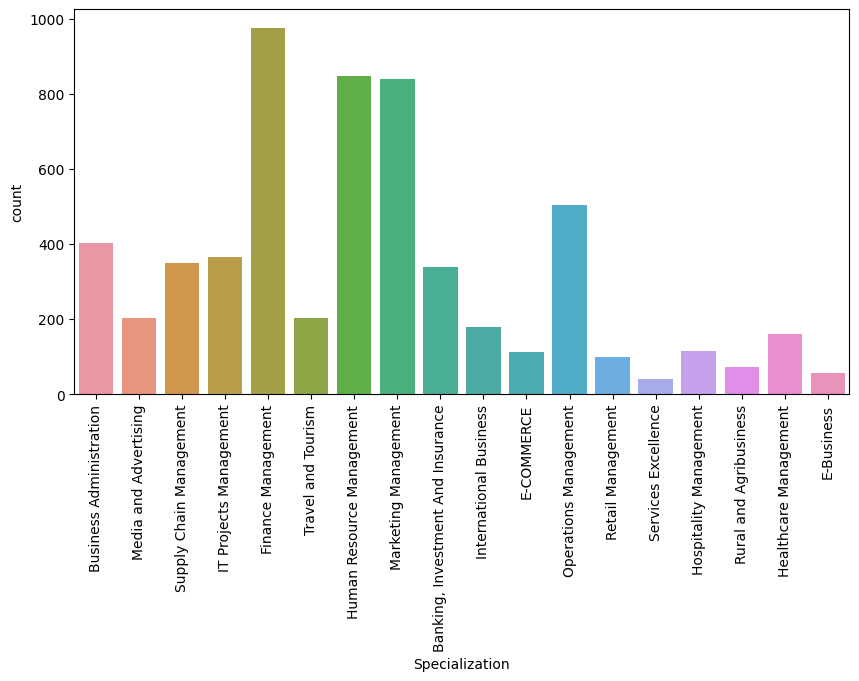

In [22]:
plot_count_plot(lead_data['Specialization'])

It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. 
So we can create a another category 'Others' for this.

In [23]:
# Creating a separate category called 'Others' for this 
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

In [24]:
# Let's check the missing percentage again
null_percent = round(lead_data.isnull().sum()/len(lead_data.index),2)*100
print(null_percent.sort_values(ascending=False))

What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
TotalVisits                                       1.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Prospect ID                                       0.0
X Education Forums                                0.0
A free copy of Mastering The Interview            0.0
I agree to pay the amount through cheque          0.0
Get updates on DM Content                         0.0
Update me on Supply Chain Content                 0.0
Tags                                              0.0
Receive More Updates About Our Courses            0.0
Through Recommendations                           0.0
Digital Advertisement                             0.0
Newspaper                                         0.0
Search                                            0.0
Newspaper Article                                 0.0
Magazine                    

##### 4. Column: 'What matters most to you in choosing a course'
This column has 29% of missing values

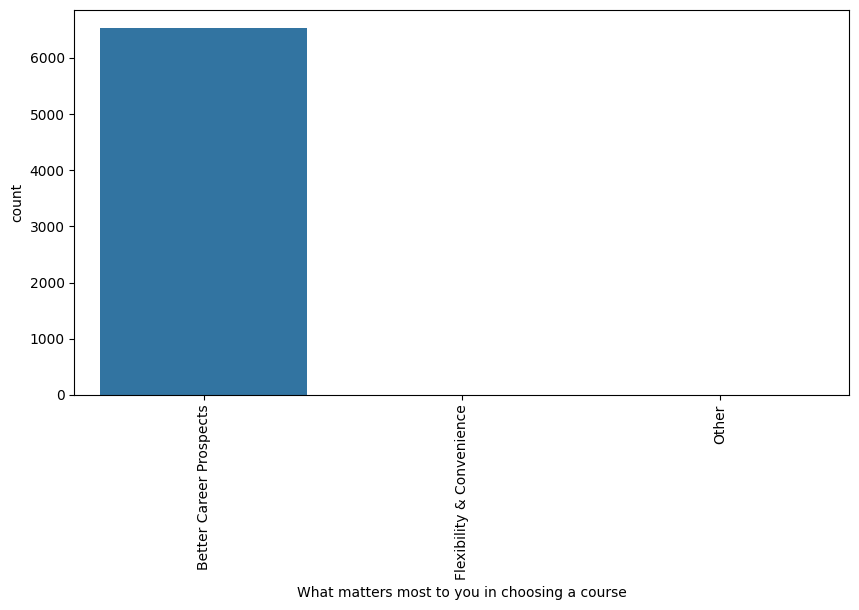

In [25]:
plot_count_plot(lead_data['What matters most to you in choosing a course'])

In [26]:
# Finding the percentage of the different categories of this column:
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

Almost 100% of the values are 'Better Career Prospects'. This makes the data highly skewed, so it's better to drop this column.

In [27]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

##### 5. Column: 'What is your current occupation'
This column has 29% null values.

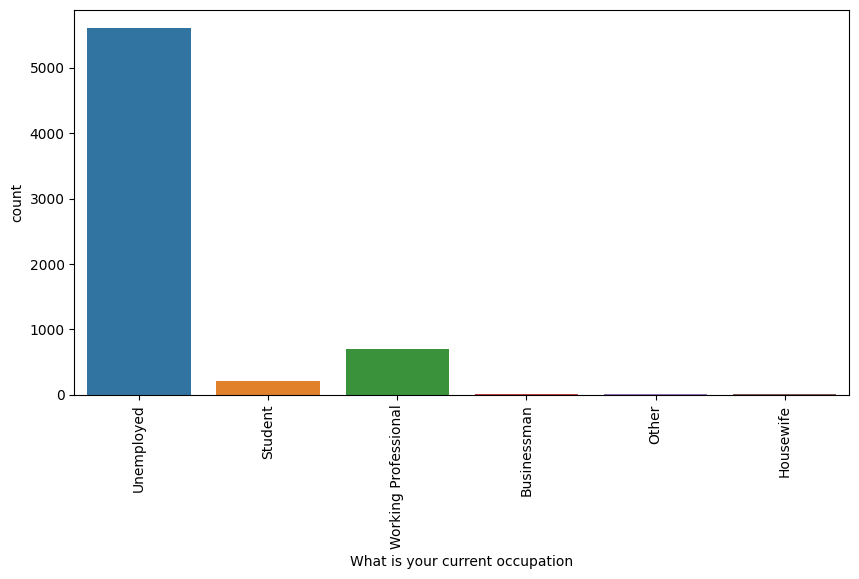

In [28]:
plot_count_plot(lead_data['What is your current occupation'])

In [29]:
# Finding the percentage of the different categories of this column:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

Now you can drop the entire row, but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. 

So let's just drop the null rows for the column What is you current occupation.

In [30]:
lead_data = lead_data[~pd.isnull(lead_data['What is your current occupation'])]

In [31]:
# Let's check the missing percentage again
null_percent = round(lead_data.isnull().sum()/len(lead_data.index),2)*100
print(null_percent.sort_values(ascending=False))

TotalVisits                                 2.0
Page Views Per Visit                        2.0
Last Activity                               2.0
Lead Source                                 1.0
Prospect ID                                 0.0
X Education Forums                          0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
Search                                      0.0
Newspaper Article                           0.0
Magazine                                    0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                          

##### 6. Columns: 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source'
These columns have less than 2% of missing values

In [32]:
# Drop the null value rows in the column 'TotalVisits'
lead_data = lead_data[~pd.isnull(lead_data['TotalVisits'])]

In [33]:
# Drop the null values rows in the column 'Lead Source'
lead_data = lead_data[~pd.isnull(lead_data['Lead Source'])]

In [34]:
# Drop the null values rows in the column 'Last Activity'
lead_data = lead_data[~pd.isnull(lead_data['Last Activity'])]

In [35]:
# Drop the null values rows in the column 'Lead Source'
lead_data = lead_data[~pd.isnull(lead_data['Lead Source'])]

In [36]:
# Let's check the missing percentage again
null_percent = round(lead_data.isnull().sum()/len(lead_data.index),2)*100
print(null_percent.sort_values(ascending=False))

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                             

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. 

These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. 

Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [37]:
lead_data.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [38]:
# Let's check the missing percentage again
null_percent = round(lead_data.isnull().sum()/len(lead_data.index),2)*100
print(null_percent.sort_values(ascending=False))

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained

In [39]:
print(round(len(lead_data.index)/9239*100,2))


69.17


We have retained 69% of the dataset which seems to be good enough.